In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
def read_text(data_path, list_of_books):
    text = ''
    for book in list_of_books:
        file_path = os.path.join(data_path, book)
        strings = open(file_path).read()
        text += strings + ' '
        text = text.lower()
    return text

In [0]:
data_path = '/content/drive/My Drive/Colab Notebooks/kazakhBooks'
train_books = ['txt1.txt' , 'txt2.txt' , 'txt3.txt', 'txt4.txt' , 'txt5.txt' , 'txt6.txt' ,  'txt7.txt' , 'txt8.txt' , 'txt9.txt']
tx = read_text(data_path , train_books)
text1 = len(tx.split(" "))
print(text1 , 'KAZAKH VOLUME')
data_path = '/content/drive/My Drive/Colab Notebooks/data'
train_books = ['txt1.txt' , 'txt2.txt' , 'txt3.txt', 'txt4.txt' , 'txt5.txt']
tx1 = read_text(data_path , train_books)
text2 = len(tx1.split(" "))
print(text2 , 'ENGLISH VOLUME')
data_path = '/content/drive/My Drive/Colab Notebooks/RUSbooks'
train_books = ['txt3.txt' , 'txt4.txt' , 'txt5.txt', 'txt6.txt' , 'txt7.txt','txt8.txt' , 'txt9.txt' , 'txt11.txt' , 'txt12.txt' , 'txt13.txt']
tx2 = read_text(data_path , train_books)
text3 = len(tx2.split(" "))
print(text3 , 'RUSSIAN VOLUME')

213069 KAZAKH VOLUME
908432 ENGLISH VOLUME
346528 RUSSIAN VOLUME


In [0]:
import re
import os
from collections import Counter
data_path = '/content/drive/My Drive/Colab Notebooks/kazakhBooks'
train_books = ['tovar.txt' , 'txt1.txt' , 'txt2.txt' , 'txt3.txt', 'txt4.txt' , 'txt5.txt' , 'txt6.txt' ,  'txt7.txt' , 'txt8.txt' , 'txt9.txt']
tx = read_text(data_path , train_books)
def words(text): return re.findall(r'\w+', text.lower())
WORDS = Counter(words(tx))
print(type(words(tx)))

<class 'list'>


In [0]:
import re, math
from collections import Counter

WORD = re.compile(r'\w+')
def get_cosine(vec1, vec2):
  intersection = set(vec1.keys()) & set(vec2.keys())
  numerator = sum([vec1[x] * vec2[x] for x in intersection])

  sum1 = sum([vec1[x]**2 for x in vec1.keys()])
  sum2 = sum([vec2[x]**2 for x in vec2.keys()])
  denominator = math.sqrt(sum1) * math.sqrt(sum2)

  if not denominator:
    return 0.0
  else:
    return float(numerator) / denominator

def text_to_vector(text):
     words = WORD.findall(text)
     return Counter(words)

text1 = 'This is a foo bar sentence .'
text2 = 'This sentence is similar to a foo bar sentence .'

vector1 = text_to_vector(text1)
vector2 = text_to_vector(text2)

cosine = get_cosine(vector1, vector2)
print(vector1)
print(vector2)
print(WORD   )
print('Cosine:', cosine)

Counter({'This': 1, 'is': 1, 'a': 1, 'foo': 1, 'bar': 1, 'sentence': 1})
Counter({'sentence': 2, 'This': 1, 'is': 1, 'similar': 1, 'to': 1, 'a': 1, 'foo': 1, 'bar': 1})
re.compile('\\w+')
Cosine: 0.8616404368553293


In [0]:
def cond(words):
  txt = {}
  for i in WORDS:
    txt[get_cosine(text_to_vector(words) , text_to_vector(i) )* P(words, sum(WORDS.values()))] = i
    return (max([int(s) for s in txt.keys()]))

In [0]:
def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N
    print(N)

In [0]:
def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

In [0]:
def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

In [0]:

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

In [0]:
def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'йцукенгшщзхъфывапролджэячсмитьбюёqwertyuiopasdfghjklzxcvbnm'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

In [0]:
def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [0]:
%%time
print(correction('appleappleappleapple'))



appleappleappleapple
CPU times: user 3.73 s, sys: 97.9 ms, total: 3.83 s
Wall time: 3.83 s


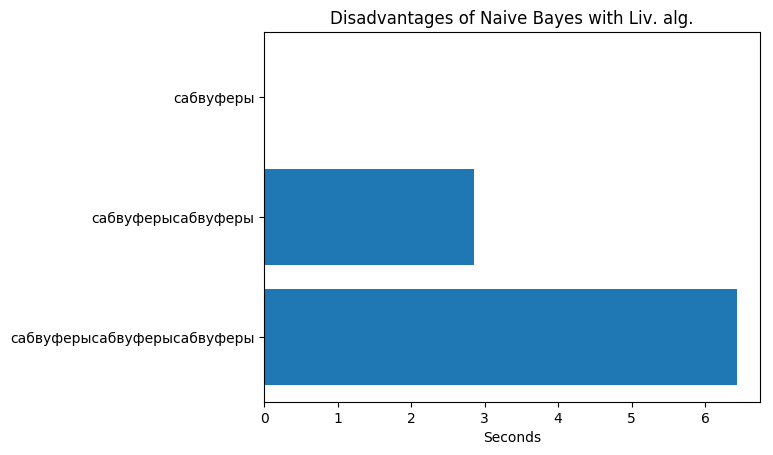

In [0]:
arr = [1.46/1000, 2.85 , 6.43]
arr2 = []
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcdefaults()
fig, ax = plt.subplots()
people = ('сабвуферы' , 'сабвуферысабвуферы', 'сабвуферысабвуферысабвуферы')
y_pos = np.arange(len(people))
performance = (1.46/1000, 2.85 , 6.43)
ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Seconds')
ax.set_title('Disadvantages of Naive Bayes with Liv. alg.')
        

# plt.plot(arr2)
# plt.plot(arr)
# plt.
# plt.title('Disadventage of Liv. distance algorithm')
# plt.xlabel('Time')
# plt.ylabel('Queries')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.savefig('Truncated_KASPI_Loss.png')
plt.show()

In [0]:
%%time
text = 'buuy samsung glaxy'
arr = text.split(" ")
donetext = ''
for i in arr:
  donetext = donetext + " " + correction(i)

print(donetext)
# s = segment('автозопчасти')
# print_suggestions('aple' , c)

 buy samsung galaxy
CPU times: user 1.46 ms, sys: 930 µs, total: 2.39 ms
Wall time: 2.27 ms


In [0]:
%%time
text =c
arr = text.split(" ")
donetext = ''
for i in arr:
  donetext = donetext + " " + correction(i)

print(donetext)
# s = segment('автозопчасти')
# print_suggestions('aple' , c)

 холодильники сатып алу алматы
CPU times: user 1.11 s, sys: 487 µs, total: 1.11 s
Wall time: 1.11 s
